In [1]:
import matplotlib as plt
%matplotlib inline

import pandas as pd
import geopandas
pd.options.display.max_rows = 50

In [2]:
# https://opendata.dc.gov/datasets/urban-forestry-street-trees?geometry=-82.731%2C37.535%2C-75.782%2C39.044
geo = geopandas.read_file("zip://./data/Urban_Forestry_Street_Trees-shp.zip")

In [3]:
type(geo)

geopandas.geodataframe.GeoDataFrame

In [4]:
geo.head()

,OBJECTID,FACILITYID,VICINITY,WARD,TBOX_L,TBOX_W,WIRES,CURB,SIDEWALK,TBOX_STAT,...,FAM_NAME,CREATED_US,CREATED_DA,EDITEDBY,LAST_EDITE,LAST_EDI_1,GENUS_NAME,GLOBALID,SHAPE,geometry
0,41335427,None,Noyes School,5.0,99.0,2.5,None,None,None,Plant,...,None,ufaarborist,2014-11-13,rschwartz,rschwartz,2019-11-21,None,{917BFA2D-1AD0-47CE-A368-262963E284C9},None,POINT (-76.99209 38.92467)
1,41335428,None,820 DELAFIELD PL NW,4.0,99.0,4.0,Both,Permanent,Permanent,Plant,...,Rosaceae,ufaarborist,2014-07-08,mertem,mertem,2019-11-22,Prunus,{55E1F5B2-4E01-41E4-B618-37C112D9EF53},None,POINT (-77.02448 38.94902)
2,41335429,None,Noyes School,5.0,99.0,2.5,None,None,None,Plant,...,None,ufaarborist,2014-11-13,rschwartz,rschwartz,2019-11-21,None,{86FD2CDA-99DD-4E78-8DF2-BE084BE0C602},None,POINT (-76.99208 38.92494)
3,41335430,None,4600 BLK Puerto Rico Ave NE,5.0,99.0,99.0,None,Permanent,None,Plant,...,Null,jpond,2016-05-06,rcorletta,rcorletta,2020-03-09,Juniperus,{AEDF7D9D-49BB-48DA-8935-0A49486251F4},None,POINT (-76.99918 38.94530)
4,41335431,33438-440-3005-0651-000,4400 blk F ST SE,7.0,99.0,3.0,Low Voltage,Permanent,Permanent,Plant,...,Rosaceae,None,1970-01-01,sdoan,rdmccully,2018-11-09,Prunus,{AD5B1339-105B-45B6-A0F6-35D1FE8185E3},None,POINT (-76.93699 38.88189)


In [5]:
geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 189852 entries, 0 to 189851
Data columns (total 38 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   OBJECTID    189852 non-null  int64   
 1   FACILITYID  152418 non-null  object  
 2   VICINITY    186492 non-null  object  
 3   WARD        189172 non-null  float64 
 4   TBOX_L      172465 non-null  float64 
 5   TBOX_W      172504 non-null  float64 
 6   WIRES       186407 non-null  object  
 7   CURB        186557 non-null  object  
 8   SIDEWALK    186414 non-null  object  
 9   TBOX_STAT   189753 non-null  object  
 10  RETIREDDT   189852 non-null  object  
 11  SCI_NM      174596 non-null  object  
 12  CMMN_NM     175504 non-null  object  
 13  DATE_PLANT  189852 non-null  object  
 14  DBH         174505 non-null  float64 
 15  DISEASE     1856 non-null    object  
 16  PESTS       1082 non-null    object  
 17  CONDITION   175609 non-null  object  
 18  CONDITIODT  1898

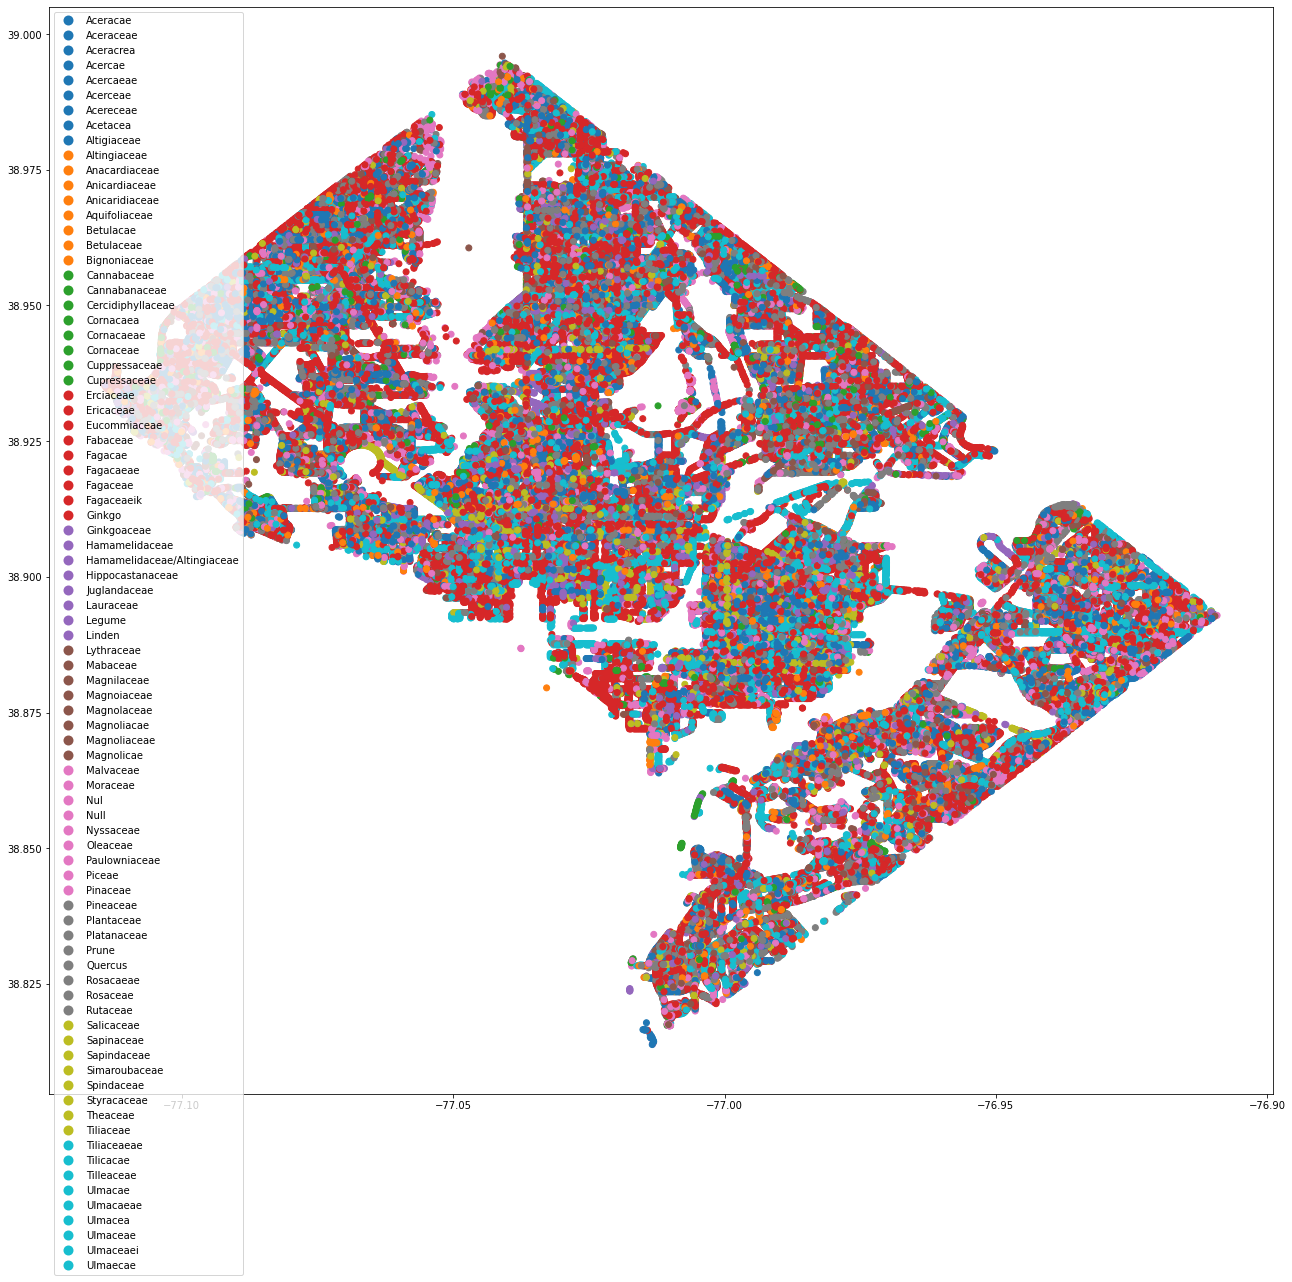

In [6]:
geo.plot('FAM_NAME', figsize=(30, 20),legend=True)

In [7]:
geo['FAM_NAME'].value_counts()

Fagaceae      39955
Aceraceae     28088
Ulmaceae      23760
Rosaceae      14925
Fabaceae      10859
              ...  
Fagaceaeik        1
Prune             1
Acercaeae         1
Cornacaeae        1
Tilicacae         1
Name: FAM_NAME, Length: 84, dtype: int64

In [8]:
# throw away one row that breaks datetime type conversion
# geo.drop(geo[geo['DATE_PLANT'].str.contains('2279-01-30')].index, inplace=True)

In [9]:
geo[(geo['DATE_PLANT'].str[0:2]!='19') & (geo['DATE_PLANT'].str[0:2]!='20')].groupby(['DATE_PLANT']).agg(['count'])

,OBJECTID,FACILITYID,VICINITY,WARD,TBOX_L,TBOX_W,WIRES,CURB,SIDEWALK,TBOX_STAT,...,FAM_NAME,CREATED_US,CREATED_DA,EDITEDBY,LAST_EDITE,LAST_EDI_1,GENUS_NAME,GLOBALID,SHAPE,geometry
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
DATE_PLANT,,,,,,,,,,,,,,,,,,,,,
1024-02-25,1,0,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,0,1
1549-03-23,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,1
1776-03-19,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,1
1799-01-03,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,1
1800-07-10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
1818-12-17,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,0,1,0,1
1875-02-25,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,1
1899-01-02,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,0,1


In [12]:
geo_clean = geo[(geo['DATE_PLANT'].str[0:2]=='19') | (geo['DATE_PLANT'].str[0:2]=='20')]

In [14]:
geo_clean['DATE_PLANT'] = pd.to_datetime(geo_clean['DATE_PLANT'])
geo_clean.info()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 189478 entries, 0 to 189851
Data columns (total 38 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   OBJECTID    189478 non-null  int64         
 1   FACILITYID  152049 non-null  object        
 2   VICINITY    186118 non-null  object        
 3   WARD        188798 non-null  float64       
 4   TBOX_L      172105 non-null  float64       
 5   TBOX_W      172141 non-null  float64       
 6   WIRES       186035 non-null  object        
 7   CURB        186183 non-null  object        
 8   SIDEWALK    186040 non-null  object        
 9   TBOX_STAT   189383 non-null  object        
 10  RETIREDDT   189478 non-null  object        
 11  SCI_NM      174420 non-null  object        
 12  CMMN_NM     175327 non-null  object        
 13  DATE_PLANT  189478 non-null  datetime64[ns]
 14  DBH         174224 non-null  float64       
 15  DISEASE     1852 non-null    object        

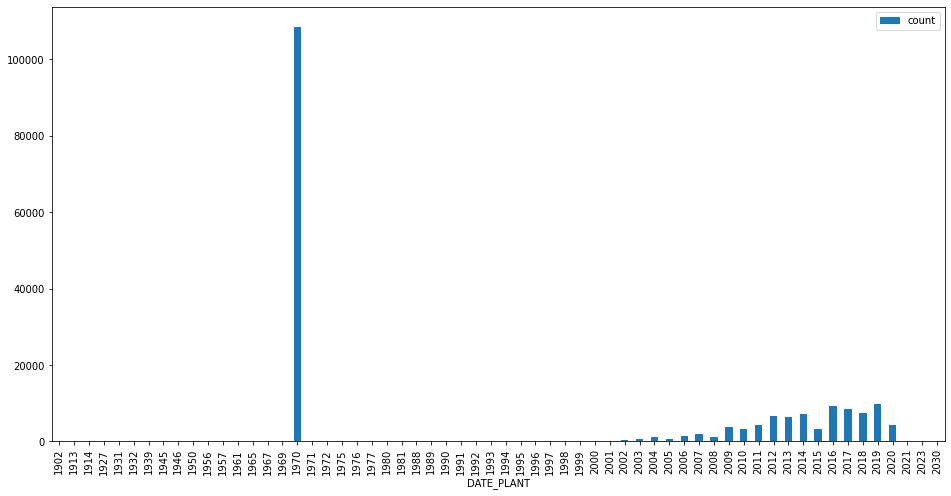

In [19]:
geo_clean["DATE_PLANT"].groupby([geo_clean["DATE_PLANT"].dt.year]).agg(['count']).plot(kind="bar", figsize=(16,8))

In [20]:
geo['GENUS_NAME'].value_counts()

Quercus          39040
Acer             28453
Ulmus            15103
Prunus           10216
Platanus          7458
                 ...  
Sorbus               2
Chamaecyparis        1
Amelanchier x        1
Phellodendron        1
Alibizia             1
Name: GENUS_NAME, Length: 77, dtype: int64

In [21]:
geo[geo['GENUS_NAME']=='Ulmus'].head()

,OBJECTID,FACILITYID,VICINITY,WARD,TBOX_L,TBOX_W,WIRES,CURB,SIDEWALK,TBOX_STAT,...,FAM_NAME,CREATED_US,CREATED_DA,EDITEDBY,LAST_EDITE,LAST_EDI_1,GENUS_NAME,GLOBALID,SHAPE,geometry
8,41335435,None,3700 48TH ST NW,3.0,99.0,99.0,None,Permanent,None,Plant,...,Ulmaceae,None,1970-01-01,mchuko,mchuko,2019-11-20,Ulmus,{E0F8FF0C-6CFE-4052-A66D-2B8DDED75F89},None,POINT (-77.09441 38.93825)
21,42094520,30540-000-3001-0504-000,48 54TH ST SE,7.0,99.0,6.0,Both,Permanent,Permanent,Plant,...,Ulmaceae,None,1970-01-01,sdoan,sdoan,2018-11-07,Ulmus,{CDD89614-F7EC-441B-86E8-3B0EF63DDB9E},None,POINT (-76.92353 38.88842)
25,42094524,37566-050-3001-0412-000,500 BLK RIDGE RD SE,7.0,99.0,4.0,None,Permanent,Permanent,Plant,...,Ulmaceae,None,1970-01-01,sdoan,sdoan,2018-11-05,Ulmus,{CAC16E68-BF10-4B61-A280-4B8B37C32560},None,POINT (-76.94610 38.88180)
51,42094550,None,5300 BLK HAYES ST NE,7.0,99.0,6.0,None,None,None,Plant,...,Ulmaceae,jburckle,2017-05-10,jburckle,ufaarborist,2018-09-21,Ulmus,{6A24CCA3-BAB9-472F-922A-C848D3478368},None,POINT (-76.92482 38.89989)
60,42094559,53191-580-3005-0063-000,5800 BLK EAST CAPITOL ST,7.0,99.0,4.0,Low Voltage,Permanent,Permanent,Plant,...,Ulmaceae,None,1970-01-01,sdoan,sdoan,2019-10-09,Ulmus,{B5884F19-264B-42CA-B808-D68A255BF57C},None,POINT (-76.91747 38.88964)
